# When Will The Bubble Pop?: Predicting The Next Recession
Kamran, Leon, Atishya, Zoe

# Research Questions
+ What were the economic predictors of the 2008 financial crisis?
+ Does our current economy exhibit similar trends?

# Data 
+ 18 total data points
+ Quandl API 
    + Federal Reserve Economic Data (FRED)
    + Yale Department of Economics
+ "Income and Poverty in the United States: 2017" (CSV), US Census
+ National Student Loan Data System (CSV)
+ Consumer Credit Panel, New York Federal Reserve (CSV)

# Analysis

In [27]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl 
import requests
import json
import os
import csv

# Quandl API Keys
api_key = "96042e6658cd41ef3713d6df5e943609"

#Python API for FRED (Federal Reserve Economic Data) and ALFRED (Archival FRED)
from fredapi import Fred

# Household Median Income 

In [28]:
#Load CSV
file_to_load = "resource/TotalHousing.csv"
housing_data = pd.read_csv(file_to_load)

#Remove extraneous rows
update_housing_df=housing_data.drop(housing_data.index[19:52])

#Remove repeated rows
new_housing=update_housing_df.drop(update_housing_df.index[4])

#Check data types
new_housing.dtypes

new_housing.describe()

,Year,Estimate
count,18.000000,18.000000
mean,2008.500000,57684.000000
std,5.338539,2014.550891
min,2000.000000,54569.000000
25%,2004.250000,55962.250000
50%,2008.500000,57911.000000
75%,2012.750000,58711.750000
max,2017.000000,61372.000000


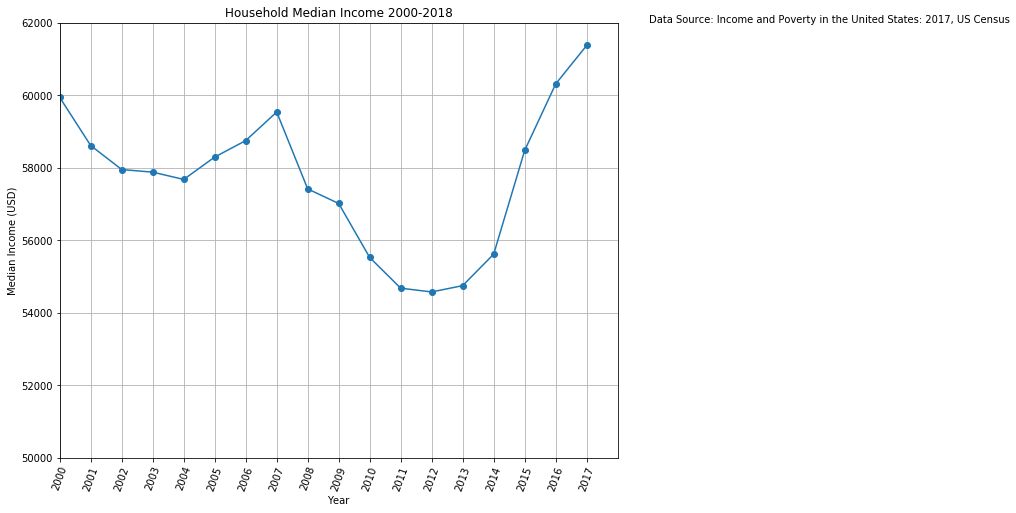

In [29]:
#Plot figure
plt.figure(figsize=(10,8))
x_axis=new_housing["Year"]
y_axis=new_housing["Estimate"]
plt.plot(x_axis,y_axis,marker="o")
plt.xlim(2000,2018)
plt.ylim(50000,62000)
plt.title("Household Median Income 2000-2018")
plt.xlabel("Year")
plt.ylabel("Median Income (USD)")
plt.xticks(rotation=70)
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.grid()
plt.text(2019,62000, "Data Source: Income and Poverty in the United States: 2017, US Census")
plt.show()

+ The US economy was doing well up until 2007 when the recession hit
+ Drop in median household income due to recession
+ Also indicative of disproportionate distribution of income
+ Since 2012, the median income has increased which can be interpreted as a healthy economy

# S&P/Case-Shiller US National Home Price Index

In [30]:
#Pull data from API
fred = Fred(api_key='96042e6658cd41ef3713d6df5e943609')
data = fred.get_series('CSUSHPINSA', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','Case Index']
data_df.describe()

,Case Index
count,217.000000
mean,153.604687
std,24.713578
min,100.000000
25%,138.484000
50%,153.813000
75%,175.124000
max,196.413000


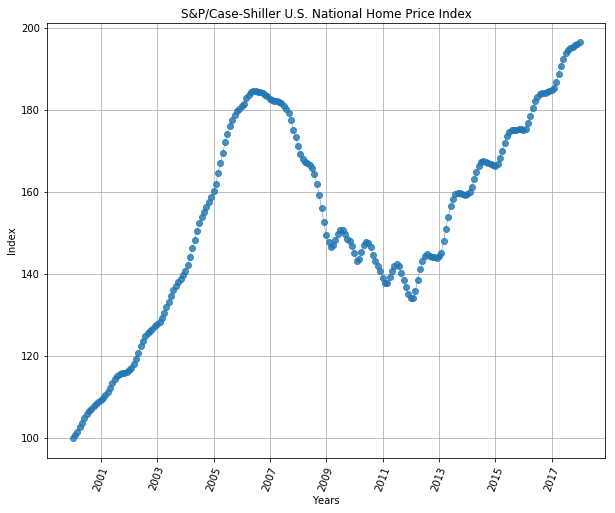

In [31]:
#Plot
plt.figure(figsize=(10,8))
x_axis=data_df["Year"]
y_axis=data_df["Case Index"]
plt.plot(x_axis,y_axis, marker="o", linewidth=0.5,alpha=0.8)
plt.title("S&P/Case-Shiller U.S. National Home Price Index")
plt.xlabel("Years")
plt.ylabel("Index")
plt.xticks(rotation=70)
plt.grid()
plt.show()

+ Accurate snapshot of the housing market that tracks the sale of homes 
    + Index measures changes in the prices of single-family homes
+ Since 2012, the trendline shows that prices are increasing exponentially, similar to median income

# Wells Fargo National Housing Market Index

In [32]:
#Python API for FRED (Federal Reserve Economic Data) and ALFRED (Archival FRED)
from fredapi import Fred

In [33]:
#NAHB / Wells Fargo National Housing Market Index
WellsFargo_HM_Index = quandl.get("NAHB/NWFHMI", authtoken="y7AX1dy3giQQhANZj-7n", collapse="annual", start_date="2000-01-01")
WellsFargo_HM_Index.describe()

,Value
count,19.000000
mean,48.263158
std,21.898356
min,9.000000
25%,27.000000
50%,57.000000
75%,65.000000
max,74.000000


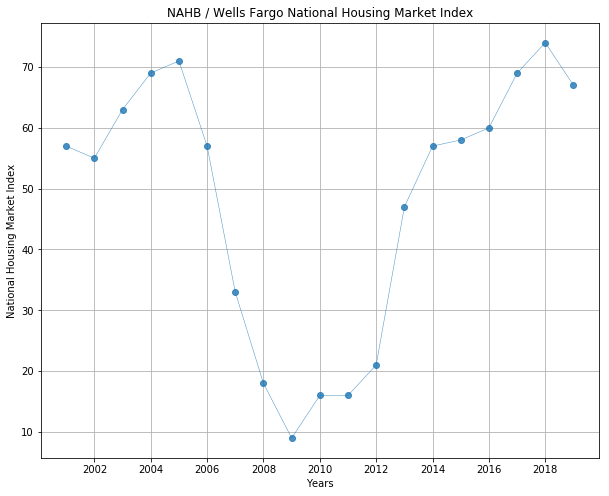

<Figure size 432x288 with 0 Axes>

In [36]:
WellsFargo_HM_Index = WellsFargo_HM_Index.reset_index()
plt.figure(figsize=(10,8))
x_vals = WellsFargo_HM_Index["Month"]
y_vals = WellsFargo_HM_Index["Value"]
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("NAHB / Wells Fargo National Housing Market Index")
plt.xlabel("Years")
plt.ylabel("National Housing Market Index")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/National_Housing_Market_Index.png")

+ The HMI is a weighted, seasonally adjusted statistic derived from ratings for present single-family sales, single-family sales in the next six months and buyers' traffic. 
+ Each RMI component & subcomponent is measured on a scale of 0 to 100, where an index number of 50 indicates equal numbers of builders/remodelers to buyers
+ The data collected is from January 2000 till present 
+ Year 2006 shows the housing market bubble with a HMI of 70 - showing more builders compared to buyers
+ Year 2009 clearly shows the housing market bust with a HMI of less than 10 - very little appetite for builders and remodellers

# Delinquency Rate on Single-Family Residential Mortgages

In [37]:
#Delinquency Rate on Single-Family Residential Mortgages
Delinquencydata = quandl.get("FRED/DRSFRMACBN", authtoken="y7AX1dy3giQQhANZj-7n", start_date="2000-01-01")
Delinquencydata.describe()

,Value
count,74.000000
mean,5.029459
std,3.410559
min,1.400000
25%,2.052500
50%,3.700000
75%,8.127500
max,11.360000


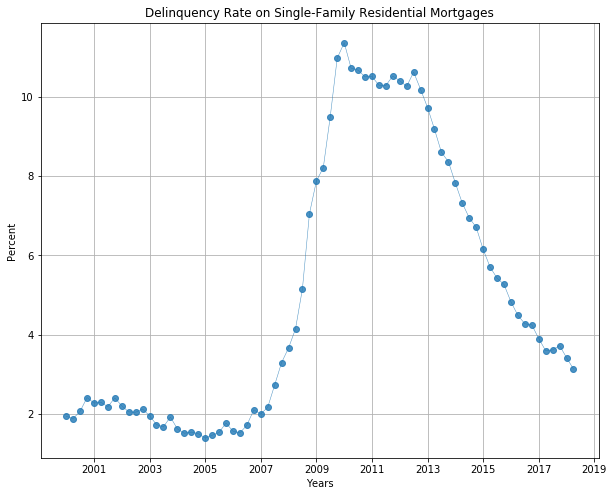

<Figure size 432x288 with 0 Axes>

In [38]:
Delinquencydata = Delinquencydata.reset_index()
plt.figure(figsize=(10,8))
x_vals = Delinquencydata["Date"]
y_vals = Delinquencydata["Value"]
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Delinquency Rate on Single-Family Residential Mortgages")
plt.xlabel("Years")
plt.ylabel("Percent")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/MortgageDelinquencyRate.png")

+ Delinquency Rate is defined and reported by Lenders when the borrower has missed two or more payments
+ The graph above show that between borrowers started defaulting on their payments starting 2005 when the delinquency rate rose from 2% and to a high above 10% by 2009
+ From 2009 thru 2010, the delinquency rate stabilized 
+ From 2012 to present, the rates have come down to under 4% but higher than before the market crashed

# Bonds Become The Safe Haven For Investors

In [39]:
# US Corporate Bonds Total Return Index
# Corporate bonds are providing higher yields and rates of returns to investors
USCorpBondsTRIndex = quandl.get("ML/TRI", authtoken="y7AX1dy3giQQhANZj-7n", start_date="2000-01-01")
USCorpBondsTRIndex.describe()

,BAMLCC0A0CMTRIV
count,4897.000000
mean,1927.505321
std,579.988184
min,984.250000
25%,1480.360000
50%,1705.640000
75%,2472.540000
max,2910.770000


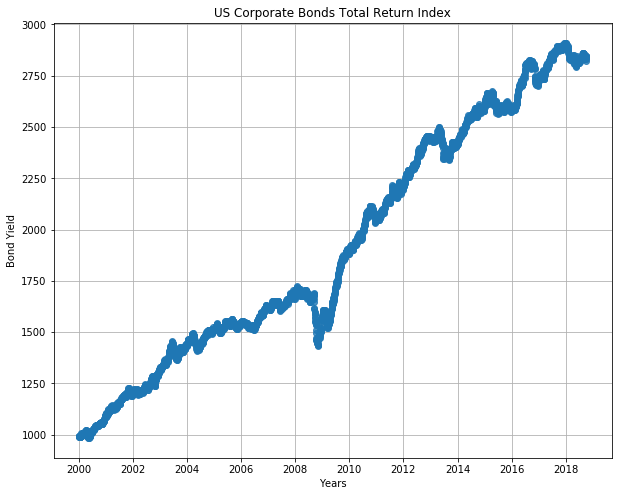

<Figure size 432x288 with 0 Axes>

In [40]:
USCorpBondsTRIndex = USCorpBondsTRIndex.reset_index()
USCorpBondsTRIndex.head()
x_vals = USCorpBondsTRIndex["DATE"]
y_vals = USCorpBondsTRIndex["BAMLCC0A0CMTRIV"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("US Corporate Bonds Total Return Index")
plt.xlabel("Years")
plt.ylabel("Bond Yield")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Corporate_Bonds_Total_Return_Index.png")

+ The above graph of the US Corporate Bonds Total Return Index showing the investment grade of Corporate Debt and attracts investors to buy corporate bonds with high yields or returns
+ Since 2008, the appetite for investors to buy corporate bonds has doubled

# Illiquidity in the bond market

In [41]:
# Nonfinancial corporate business; debt securities; liability, Level
# Corporate Debt is risings - in a bubble
# We are in a corporate debt bubble
# FRED API_KEY NCBDBIQ027S
from fredapi import Fred
fred = Fred(api_key='96042e6658cd41ef3713d6df5e943609')
data = fred.get_series('NCBDBIQ027S', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','NCBDBIQ027S']
data_df.describe()

,NCBDBIQ027S
count,7.300000e+01
mean,3.937598e+06
std,1.090051e+06
min,2.583458e+06
25%,3.004471e+06
50%,3.625846e+06
75%,4.777538e+06
max,6.218665e+06


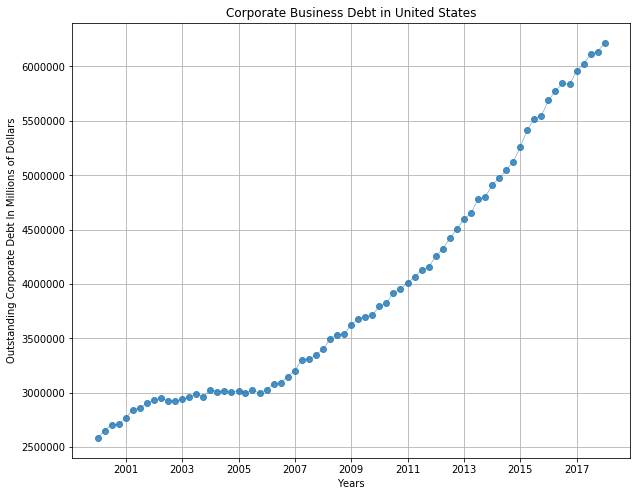

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot Nonfinancial corporate business; debt securities; liability, Level
# FRED API_KEY NCBDBIQ027S
x_vals = data_df["Year"]
y_vals = data_df["NCBDBIQ027S"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Corporate Business Debt in United States")
plt.xlabel("Years")
plt.ylabel("Outstanding Corporate Debt In Millions of Dollars")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Corporate_Business_Debt.png")

+ An asset is said to be “liquid” if traders can convert it quickly to cash without materially affecting its market price
+ Most bond markets are highly illiquid as most bonds are traded 
+ As shown by the graph above, we see a steady rise in outstanding corporate debt
+ Unlike the stock market, bonds are typically trade over-the-counter (OTC)—in a decentralized trading environment where the number of buyers may be far less than the number of sellers
+ Since 2007 to present, the supply of U.S. corporate bonds has gone up from 3 trillion dollars to 6 trillion dollars

# Household Debt To GDP

In [43]:
# Household Debt to GDP for United States
from fredapi import Fred
fred = Fred(api_key='96042e6658cd41ef3713d6df5e943609')
data = fred.get_series('HDTGPDUSQ163N', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','HDTGPDUSQ163N']
data_df.describe()

,HDTGPDUSQ163N
count,48.000000
mean,88.961647
std,6.939734
min,79.872463
25%,81.818527
50%,88.921509
75%,95.841805
max,99.187078


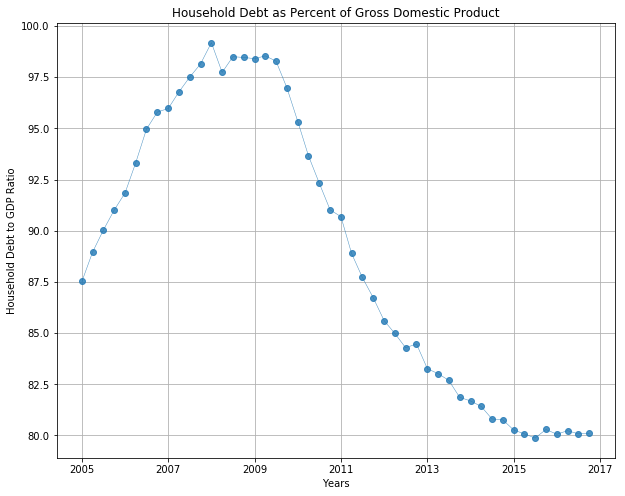

<Figure size 432x288 with 0 Axes>

In [44]:
# Plot Household Debt to GDP for United States (HDTGPDUSQ163N)
x_vals = data_df["Year"]
y_vals = data_df["HDTGPDUSQ163N"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Household Debt as Percent of Gross Domestic Product")
plt.xlabel("Years")
plt.ylabel("Household Debt to GDP Ratio")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Household_Debt_to_GDP.png")

+ GDP or gross domestic product is the final value of all the goods and services produced annually by the US
+ Household debt rose from 87.% in 2005 to it's peak of over 100% by between 2007 and 2008
+ Since 2009 to present household debt has gone down to 80% of GDP

# Total Federal Debt As A Share Of GDP

In [45]:
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product
# FRED API_KEY GFDEGDQ188S
from fredapi import Fred
fred = Fred(api_key='96042e6658cd41ef3713d6df5e943609')
data = fred.get_series('GFDEGDQ188S', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','GFDEGDQ188S']
data_df.describe()

,GFDEGDQ188S
count,73.000000
mean,78.793460
std,19.809562
min,54.037660
25%,60.073850
50%,77.299700
75%,100.427220
max,105.256170


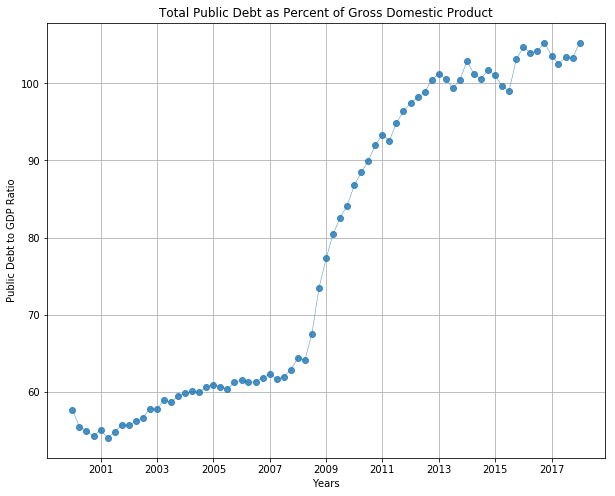

<Figure size 432x288 with 0 Axes>

In [46]:
# plot 
x_vals = data_df["Year"]
y_vals = data_df["GFDEGDQ188S"]
plt.figure(figsize=(10,8))
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8)
# Add labels to the x and y axes and a title
plt.title("Total Public Debt as Percent of Gross Domestic Product")
plt.xlabel("Years")
plt.ylabel("Public Debt to GDP Ratio")
plt.grid()
plt.show()
plt.tight_layout()
#plt.savefig("archive/Public_Debt_to_GDP.png")

+ Federal debt was around 60 % of GDP for close to 10 years untill the recession
+ Since the recent recession, Federal debt is spiralling out of control to over 100% of GDP
+ Marked increase in debt as a response to the recession is alarming